<a href="https://colab.research.google.com/github/PraveenLiyanage/Resume-Screening/blob/main/ResumeScreening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
resumeDataSet = pd.read_csv('/content/drive/MyDrive/ResumeScreening/UpdatedResumeDataSet.csv', encoding= 'utf-8')
print(resumeDataSet.head())

       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...


In [ ]:
resumeDataSet.shape

(962, 2)

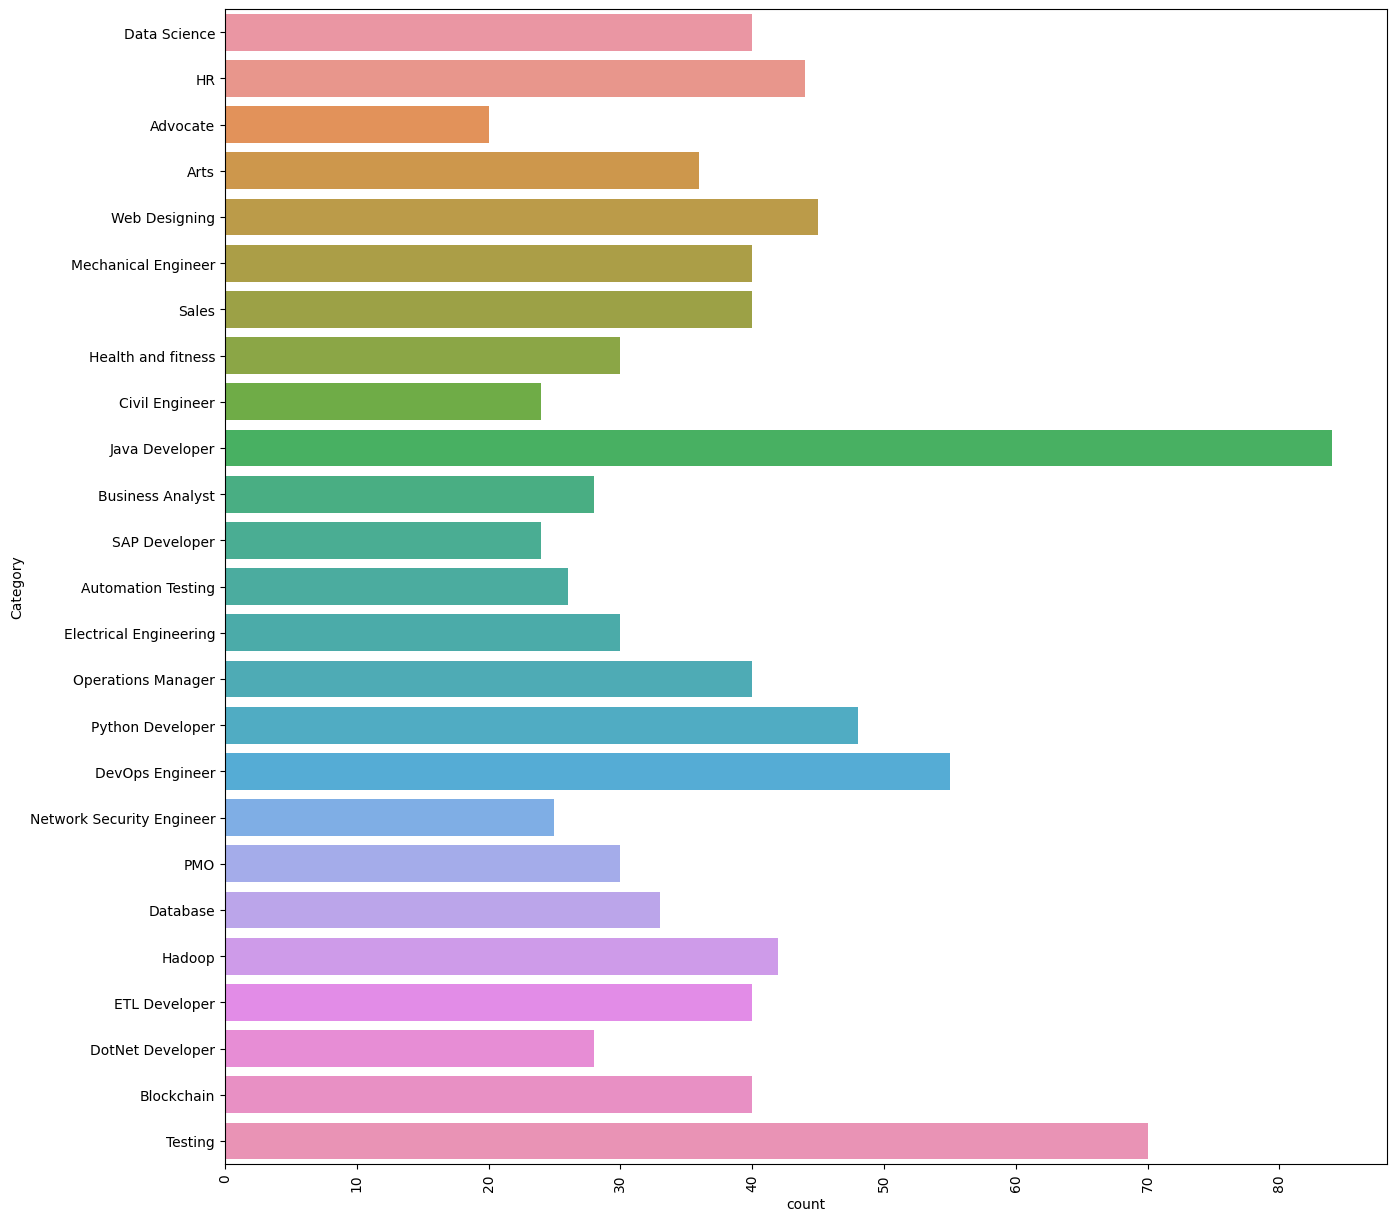

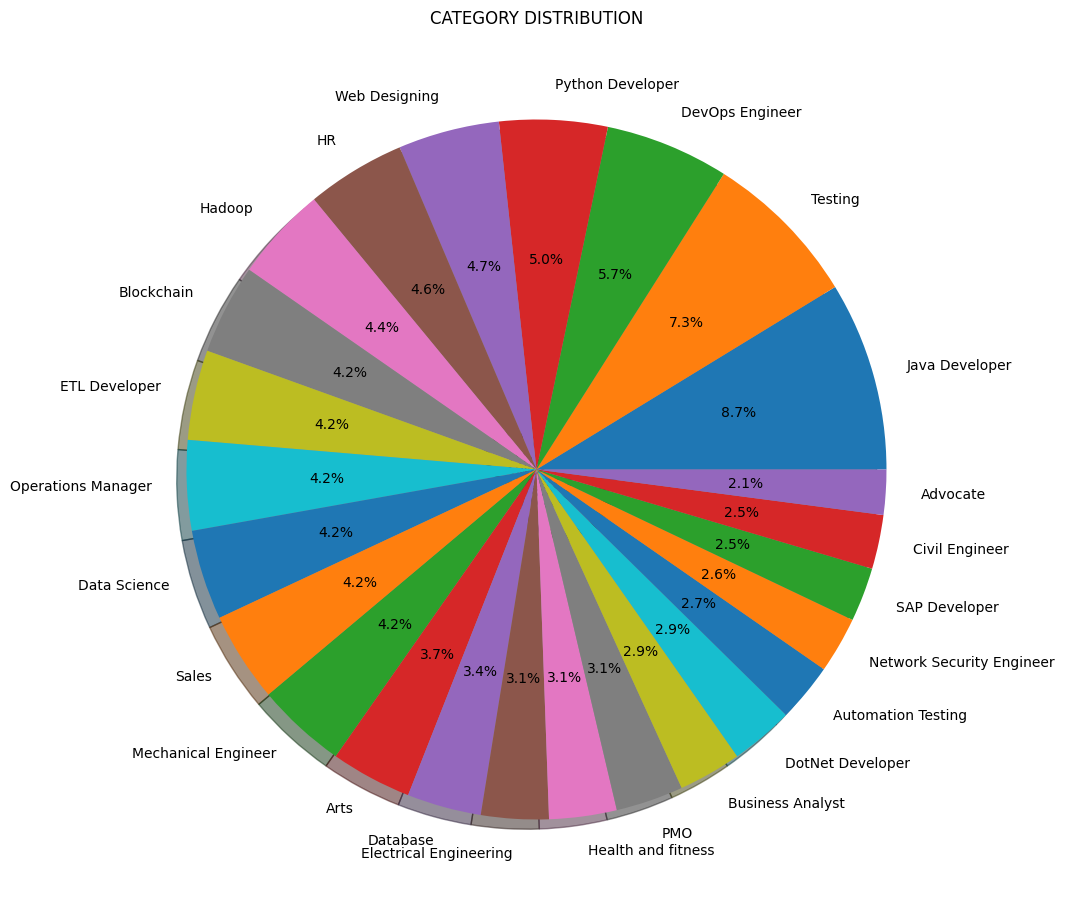

In [ ]:
# EDA - Countplot
plt.figure(figsize=(15, 15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)
plt.savefig('../content/drive/MyDrive/ResumeScreening/output/jobcategory_details.png')
plt.show()  # Display the plot

# Pie Chart
targetCounts = resumeDataSet['Category'].value_counts().reset_index()['Category']
targetLabels = resumeDataSet['Category'].value_counts().reset_index()['index']

# Make square figures and axes
plt.figure(figsize=(25, 25))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.savefig('../content/drive/MyDrive/ResumeScreening/output/category_dist.png')
plt.show()  # Display the plot

In [ ]:
# Data Preprocessing Function
def cleanResume(resumeText):
    # Remove URLs
    resumeText = re.sub('httpS+s*', ' ', resumeText)
    # Remove RT and cc
    resumeText = re.sub('RT|cc', ' ', resumeText)
    # Remove Hashtags
    resumeText = re.sub('#S+', '', resumeText)
    # Remove Mentions
    resumeText = re.sub('@S+', '  ', resumeText)
    # Remove Punctuations
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText)
    # Remove Extra Whitespaces
    resumeText = re.sub('s+', ' ', resumeText)
    return resumeText

# Apply the cleaning function to the 'Resume' column
resumeDataSet['cleaned_resume'] = resumeDataSet['Resume'].apply(lambda x: cleanResume(x))

# Label Encoding for 'Category' column
le = LabelEncoder()
resumeDataSet['Category'] = le.fit_transform(resumeDataSet['Category'])

# Extract required text and target
requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

# Create a TF-IDF vectorizer
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500
)

# Fit and transform the text data
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [ ]:
# Model Building
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=0, test_size=0.2)
print(X_train.shape[0])
print(X_test.shape[0])

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

769
193


In [ ]:
# Result
print('Accuracy of KNeighbours Classifier on training set: {:.2f}'.format(clf.score(X_train,y_train)))
print('Accuracy of KNeighbours Classifier on test set: {:.2f}'.format(clf.score(X_test,y_test)))

Accuracy of KNeighbours Classifier on training set: 0.99
Accuracy of KNeighbours Classifier on test set: 0.99


In [ ]:
print("n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

n Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.